# Starbucks Capstone Challenge

### Introduction

This data set contains simulated data that mimics customer behavior on the Starbucks rewards mobile app. Once every few days, Starbucks sends out an offer to users of the mobile app. An offer can be merely an advertisement for a drink or an actual offer such as a discount or BOGO (buy one get one free). Some users might not receive any offer during certain weeks. 

Not all users receive the same offer, and that is the challenge to solve with this data set.

Your task is to combine transaction, demographic and offer data to determine which demographic groups respond best to which offer type. This data set is a simplified version of the real Starbucks app because the underlying simulator only has one product whereas Starbucks actually sells dozens of products.

Every offer has a validity period before the offer expires. As an example, a BOGO offer might be valid for only 5 days. You'll see in the data set that informational offers have a validity period even though these ads are merely providing information about a product; for example, if an informational offer has 7 days of validity, you can assume the customer is feeling the influence of the offer for 7 days after receiving the advertisement.

You'll be given transactional data showing user purchases made on the app including the timestamp of purchase and the amount of money spent on a purchase. This transactional data also has a record for each offer that a user receives as well as a record for when a user actually views the offer. There are also records for when a user completes an offer. 

Keep in mind as well that someone using the app might make a purchase through the app without having received an offer or seen an offer.

### Example

To give an example, a user could receive a discount offer buy 10 dollars get 2 off on Monday. The offer is valid for 10 days from receipt. If the customer accumulates at least 10 dollars in purchases during the validity period, the customer completes the offer.

However, there are a few things to watch out for in this data set. Customers do not opt into the offers that they receive; in other words, a user can receive an offer, never actually view the offer, and still complete the offer. For example, a user might receive the "buy 10 dollars get 2 dollars off offer", but the user never opens the offer during the 10 day validity period. The customer spends 15 dollars during those ten days. There will be an offer completion record in the data set; however, the customer was not influenced by the offer because the customer never viewed the offer.

### Cleaning

This makes data cleaning especially important and tricky.

You'll also want to take into account that some demographic groups will make purchases even if they don't receive an offer. From a business perspective, if a customer is going to make a 10 dollar purchase without an offer anyway, you wouldn't want to send a buy 10 dollars get 2 dollars off offer. You'll want to try to assess what a certain demographic group will buy when not receiving any offers.

### Final Advice

Because this is a capstone project, you are free to analyze the data any way you see fit. For example, you could build a machine learning model that predicts how much someone will spend based on demographics and offer type. Or you could build a model that predicts whether or not someone will respond to an offer. Or, you don't need to build a machine learning model at all. You could develop a set of heuristics that determine what offer you should send to each customer (i.e., 75 percent of women customers who were 35 years old responded to offer A vs 40 percent from the same demographic to offer B, so send offer A).

# Data Sets

The data is contained in three files:

* portfolio.json - containing offer ids and meta data about each offer (duration, type, etc.)
* profile.json - demographic data for each customer
* transcript.json - records for transactions, offers received, offers viewed, and offers completed

Here is the schema and explanation of each variable in the files:

**portfolio.json**
* id (string) - offer id
* offer_type (string) - type of offer ie BOGO, discount, informational
* difficulty (int) - minimum required spend to complete an offer
* reward (int) - reward given for completing an offer
* duration (int) - time for offer to be open, in days
* channels (list of strings)

**profile.json**
* age (int) - age of the customer 
* became_member_on (int) - date when customer created an app account
* gender (str) - gender of the customer (note some entries contain 'O' for other rather than M or F)
* id (str) - customer id
* income (float) - customer's income

**transcript.json**
* event (str) - record description (ie transaction, offer received, offer viewed, etc.)
* person (str) - customer id
* time (int) - time in hours since start of test. The data begins at time t=0
* value - (dict of strings) - either an offer id or transaction amount depending on the record

**Note:** If you are using the workspace, you will need to go to the terminal and run the command `conda update pandas` before reading in the files. This is because the version of pandas in the workspace cannot read in the transcript.json file correctly, but the newest version of pandas can. You can access the termnal from the orange icon in the top left of this notebook.  

You can see how to access the terminal and how the install works using the two images below.  First you need to access the terminal:

<img src="pic1.png"/>

Then you will want to run the above command:

<img src="pic2.png"/>

Finally, when you enter back into the notebook (use the jupyter icon again), you should be able to run the below cell without any errors.

# INTRODUCTION
The users are provided with offers every day- especially from brands they use or those whose membership they signed up for. These offers are of different types- a regular discount offer, buy X get Y, referral offers, etc. Additionally, their mode of delivery varies- it could be via emails, social media, TV advertisements, OTT ads, pop-up ads on some websites, etc. Some users love getting offers and actually fulfill those to get the rewards. Some are only irritated by these and never completely participate in these offers. A business needs to analyze these trends for better customer acquisition and retention.<br><br>
In collaboration with the Udacity Data Science Nanodegree program, Starbucks has provided data for the various offers rolled out to the users of the Starbucks rewards mobile app over time through various channels. The data contains information about offers, users, and the events such as offers received, viewed, or completed.<br><br>
Our job is to analyze these three data sets and figure out the patterns that would improve the offer success rates, i.e., figuring out which type of users would be better for which types of offers. In other words, customer segmentation- here, this means grouping customers according to the type of offers.<br><br>
I decided to take it a step further and tried to fit the data into a classification model that would predict if a particular type of offer with its given attributes would be successful for a given user.

### Importing the required libraries
In this project we will be using pandas and numpy libraries to store and process the data, matplotlib library to plot the graphs for EDA, and sklearn library to model the data into a classifier. Particularly, we will be using Logistic Regressor, Random Forest Classifier, and GridSearchCv.

In [1]:
from sklearn.model_selection import train_test_split, cross_validate, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report as report
import seaborn as sns

In [2]:
import pandas as pd
import numpy as np
import math
import json
import matplotlib.pyplot as plt
%matplotlib inline

# read in the json files
portfolio = pd.read_json('portfolio.json', orient='records', lines=True)
profile = pd.read_json('profile.json', orient='records', lines=True)
transcript = pd.read_json('transcript.json', orient='records', lines=True)

Describing the datasets by printing the first 10 rows of each:

In [3]:
portfolio.head()

,reward,channels,difficulty,duration,offer_type,id
0,10,"[email, mobile, social]",10,7,bogo,ae264e3637204a6fb9bb56bc8210ddfd
1,10,"[web, email, mobile, social]",10,5,bogo,4d5c57ea9a6940dd891ad53e9dbe8da0
2,0,"[web, email, mobile]",0,4,informational,3f207df678b143eea3cee63160fa8bed
3,5,"[web, email, mobile]",5,7,bogo,9b98b8c7a33c4b65b9aebfe6a799e6d9
4,5,"[web, email]",20,10,discount,0b1e1539f2cc45b7b9fa7c272da2e1d7


In [4]:
profile.head()

,gender,age,id,became_member_on,income
0,None,118,68be06ca386d4c31939f3a4f0e3dd783,20170212,NaN
1,F,55,0610b486422d4921ae7d2bf64640c50b,20170715,112000.0
2,None,118,38fe809add3b4fcf9315a9694bb96ff5,20180712,NaN
3,F,75,78afa995795e4d85b5d9ceeca43f5fef,20170509,100000.0
4,None,118,a03223e636434f42ac4c3df47e8bac43,20170804,NaN


In [5]:
transcript.head()

,person,event,value,time
0,78afa995795e4d85b5d9ceeca43f5fef,offer received,{'offer id': '9b98b8c7a33c4b65b9aebfe6a799e6d9'},0
1,a03223e636434f42ac4c3df47e8bac43,offer received,{'offer id': '0b1e1539f2cc45b7b9fa7c272da2e1d7'},0
2,e2127556f4f64592b11af22de27a7932,offer received,{'offer id': '2906b810c7d4411798c6938adc9daaa5'},0
3,8ec6ce2a7e7949b1bf142def7d0e0586,offer received,{'offer id': 'fafdcd668e3743c1bb461111dcafc2a4'},0
4,68617ca6246f4fbc85e91a2a49552598,offer received,{'offer id': '4d5c57ea9a6940dd891ad53e9dbe8da0'},0


In [6]:
portfolio.describe()

,reward,difficulty,duration
count,10.000000,10.000000,10.000000
mean,4.200000,7.700000,6.500000
std,3.583915,5.831905,2.321398
min,0.000000,0.000000,3.000000
25%,2.000000,5.000000,5.000000
50%,4.000000,8.500000,7.000000
75%,5.000000,10.000000,7.000000
max,10.000000,20.000000,10.000000


In [7]:
transcript.describe()

,time
count,306534.000000
mean,366.382940
std,200.326314
min,0.000000
25%,186.000000
50%,408.000000
75%,528.000000
max,714.000000


In [8]:
profile.describe()

,age,became_member_on,income
count,17000.000000,1.700000e+04,14825.000000
mean,62.531412,2.016703e+07,65404.991568
std,26.738580,1.167750e+04,21598.299410
min,18.000000,2.013073e+07,30000.000000
25%,45.000000,2.016053e+07,49000.000000
50%,58.000000,2.017080e+07,64000.000000
75%,73.000000,2.017123e+07,80000.000000
max,118.000000,2.018073e+07,120000.000000


# Data Preprocessing
We will now perform data preprocessing, and clean the data sets to be fit into the model.

### Portfolio
Starting with the portfolio dataset, our objectives are:
1. Divide the channels list into individual columns of 1 or 0. For this we need to first get the unique channels.
2. Map the offer id (the id field) from hashed value to a sequence value starting from 1. Maintain this map using a dictionary, as this will be a universal mapping of offer id for all data sets.
3. Get the dummy variables of offer_type
4. Convert the duration from days to hours, as the timeline of offers in transcript dataset is given in hours.

In [9]:
# printing the data set
print(portfolio.shape)
portfolio

(10, 6)


,reward,channels,difficulty,duration,offer_type,id
0,10,"[email, mobile, social]",10,7,bogo,ae264e3637204a6fb9bb56bc8210ddfd
1,10,"[web, email, mobile, social]",10,5,bogo,4d5c57ea9a6940dd891ad53e9dbe8da0
2,0,"[web, email, mobile]",0,4,informational,3f207df678b143eea3cee63160fa8bed
3,5,"[web, email, mobile]",5,7,bogo,9b98b8c7a33c4b65b9aebfe6a799e6d9
4,5,"[web, email]",20,10,discount,0b1e1539f2cc45b7b9fa7c272da2e1d7
5,3,"[web, email, mobile, social]",7,7,discount,2298d6c36e964ae4a3e7e9706d1fb8c2
6,2,"[web, email, mobile, social]",10,10,discount,fafdcd668e3743c1bb461111dcafc2a4
7,0,"[email, mobile, social]",0,3,informational,5a8bc65990b245e5a138643cd4eb9837
8,5,"[web, email, mobile, social]",5,5,bogo,f19421c1d4aa40978ebb69ca19b0e20d
9,2,"[web, email, mobile]",10,7,discount,2906b810c7d4411798c6938adc9daaa5


In [10]:
# check for null values
portfolio.isna().sum().sum()

0

In [11]:
#get unique channels
def getUnique(series):
    '''
    The function takes the series consisting of lists of channels for different offer.
    Input-
        series: series of channels of different offers
    Return-
        set of unique channels
    '''
    unique = set()
    for row in series:
        for val in row:
            unique.add(val)
    return unique

uniqueChannels = getUnique(portfolio.channels)
print(uniqueChannels)

{'mobile', 'email', 'web', 'social'}


In [12]:
# get channel value as 1 or 0
def getChannelValue(channelsArr, channel):
    '''
    The function returns if the channel is in channels array.
    Input-
        channelsArr: array of channels for different offers
    Return-
        1 if the channel is present, else 0.
    '''
    if channel in channelsArr:
        return 1
    return 0

In [13]:
for channel in uniqueChannels:
    portfolio[channel] = portfolio.apply(lambda val: getChannelValue(val.channels, channel), axis=1)
dfPortfolio = portfolio.drop('channels', axis=1)
dfPortfolio.head()

,reward,difficulty,duration,offer_type,id,mobile,email,web,social
0,10,10,7,bogo,ae264e3637204a6fb9bb56bc8210ddfd,1,1,0,1
1,10,10,5,bogo,4d5c57ea9a6940dd891ad53e9dbe8da0,1,1,1,1
2,0,0,4,informational,3f207df678b143eea3cee63160fa8bed,1,1,1,0
3,5,5,7,bogo,9b98b8c7a33c4b65b9aebfe6a799e6d9,1,1,1,0
4,5,20,10,discount,0b1e1539f2cc45b7b9fa7c272da2e1d7,0,1,1,0


Map hashed offer ids to a sequence of number.

In [14]:
offer_id_map = dict()
seq = 1
for offId in dfPortfolio.id:
    if offId not in offer_id_map:
        offer_id_map[offId] = seq
        seq+=1

portfolio['offer_id'] = portfolio.apply(lambda val: offer_id_map[val.id], axis=1)
dfPortfolio = portfolio.drop(['id', 'channels'], axis=1)

In [15]:
dfPortfolio

,reward,difficulty,duration,offer_type,mobile,email,web,social,offer_id
0,10,10,7,bogo,1,1,0,1,1
1,10,10,5,bogo,1,1,1,1,2
2,0,0,4,informational,1,1,1,0,3
3,5,5,7,bogo,1,1,1,0,4
4,5,20,10,discount,0,1,1,0,5
5,3,7,7,discount,1,1,1,1,6
6,2,10,10,discount,1,1,1,1,7
7,0,0,3,informational,1,1,0,1,8
8,5,5,5,bogo,1,1,1,1,9
9,2,10,7,discount,1,1,1,0,10


In [16]:
# get dummies of offer_type
dfPortfolio = dfPortfolio.join(pd.get_dummies(dfPortfolio.offer_type, prefix='offer_type'
                                             )).drop('offer_type', axis=1)
dfPortfolio

,reward,difficulty,duration,mobile,email,web,social,offer_id,offer_type_bogo,offer_type_discount,offer_type_informational
0,10,10,7,1,1,0,1,1,1,0,0
1,10,10,5,1,1,1,1,2,1,0,0
2,0,0,4,1,1,1,0,3,0,0,1
3,5,5,7,1,1,1,0,4,1,0,0
4,5,20,10,0,1,1,0,5,0,1,0
5,3,7,7,1,1,1,1,6,0,1,0
6,2,10,10,1,1,1,1,7,0,1,0
7,0,0,3,1,1,0,1,8,0,0,1
8,5,5,5,1,1,1,1,9,1,0,0
9,2,10,7,1,1,1,0,10,0,1,0


In [17]:
# converting duration from days to hours
dfPortfolio['duration'] = dfPortfolio.duration.apply(lambda val: val*24)
dfPortfolio

,reward,difficulty,duration,mobile,email,web,social,offer_id,offer_type_bogo,offer_type_discount,offer_type_informational
0,10,10,168,1,1,0,1,1,1,0,0
1,10,10,120,1,1,1,1,2,1,0,0
2,0,0,96,1,1,1,0,3,0,0,1
3,5,5,168,1,1,1,0,4,1,0,0
4,5,20,240,0,1,1,0,5,0,1,0
5,3,7,168,1,1,1,1,6,0,1,0
6,2,10,240,1,1,1,1,7,0,1,0
7,0,0,72,1,1,0,1,8,0,0,1
8,5,5,120,1,1,1,1,9,1,0,0
9,2,10,168,1,1,1,0,10,0,1,0


## Profile
Now, we would clean the profile dataset. Our objectives for this dataset are:
1. Check for null values and drop, if any. Maintain the dropped user ids, as we would be dropping the corresponding records in transcript dataset.
2. Map the hashed value of user id to a sequence value starting from 1. Maintain this map using a dictionary, as this will be a universal mapping of user id for all data sets.
3. Format the member_since attribute using pd.datetime.
4. Separate the day, month, and year from the above formatted attribute.
5. Create the dummies of the gender attribute.

In [18]:
# printing head of profile
print(profile.shape)
profile.head()

(17000, 5)


,gender,age,id,became_member_on,income
0,None,118,68be06ca386d4c31939f3a4f0e3dd783,20170212,NaN
1,F,55,0610b486422d4921ae7d2bf64640c50b,20170715,112000.0
2,None,118,38fe809add3b4fcf9315a9694bb96ff5,20180712,NaN
3,F,75,78afa995795e4d85b5d9ceeca43f5fef,20170509,100000.0
4,None,118,a03223e636434f42ac4c3df47e8bac43,20170804,NaN


In [19]:
profile.isna().sum()

gender              2175
age                    0
id                     0
became_member_on       0
income              2175
dtype: int64

In [20]:
# dropping the null values
droppedUserIds = profile.id[profile.isna().sum(axis=1)[profile.isna().sum(axis=1)>0].index]

In [21]:
dfProfile = profile.dropna(axis=0)

In [22]:
dfProfile.isna().sum().sum()

0

In [23]:
# mapping user id to sequence values
user_id_map = dict()
seq = 1
for uId in dfProfile.id:
    if uId not in user_id_map:
        user_id_map[uId] = seq
        seq += 1

dfProfile['user_id'] = dfProfile.apply(lambda val: user_id_map[val.id], axis=1)
dfProfile.drop('id', inplace=True, axis=1)
dfProfile.head()

<ipython-input-23-b1441982723b>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfProfile['user_id'] = dfProfile.apply(lambda val: user_id_map[val.id], axis=1)
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/pandas/core/frame.py:4305: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


,gender,age,became_member_on,income,user_id
1,F,55,20170715,112000.0,1
3,F,75,20170509,100000.0,2
5,M,68,20180426,70000.0,3
8,M,65,20180209,53000.0,4
12,M,58,20171111,51000.0,5


In [24]:
len(user_id_map)

14825

In [25]:
dfProfile.shape

(14825, 5)

In [26]:
# formatting the member_since to pd.datetime
dfProfile['member_since'] = pd.to_datetime(dfProfile.became_member_on, format='%Y%m%d')
dfProfile.drop('became_member_on', inplace=True, axis=1)

<ipython-input-26-934f4ef8e539>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfProfile['member_since'] = pd.to_datetime(dfProfile.became_member_on, format='%Y%m%d')
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/pandas/core/frame.py:4305: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [27]:
dfProfile.head()

,gender,age,income,user_id,member_since
1,F,55,112000.0,1,2017-07-15
3,F,75,100000.0,2,2017-05-09
5,M,68,70000.0,3,2018-04-26
8,M,65,53000.0,4,2018-02-09
12,M,58,51000.0,5,2017-11-11


In [28]:
# getting dummies of gender
dfProfile = dfProfile.join(pd.get_dummies(dfProfile.gender, prefix='gender')).drop('gender', axis=1)

In [29]:
dfProfile.head()

,age,income,user_id,member_since,gender_F,gender_M,gender_O
1,55,112000.0,1,2017-07-15,1,0,0
3,75,100000.0,2,2017-05-09,1,0,0
5,68,70000.0,3,2018-04-26,0,1,0
8,65,53000.0,4,2018-02-09,0,1,0
12,58,51000.0,5,2017-11-11,0,1,0


In [30]:
# separating the member_since in days, months, year
dfProfile['signup_day'] = dfProfile.member_since.dt.day
dfProfile['signup_month'] = dfProfile.member_since.dt.month
dfProfile['signup_year'] = dfProfile.member_since.dt.year
dfProfile.drop('member_since', axis=1, inplace=True)
dfProfile.head()

,age,income,user_id,gender_F,gender_M,gender_O,signup_day,signup_month,signup_year
1,55,112000.0,1,1,0,0,15,7,2017
3,75,100000.0,2,1,0,0,9,5,2017
5,68,70000.0,3,0,1,0,26,4,2018
8,65,53000.0,4,0,1,0,9,2,2018
12,58,51000.0,5,0,1,0,11,11,2017


## Transcript
The transcript dataset would be cleaned in the following ways:
1. Drop the records for the dropped user ids.
2. Using the map for offer id, put the corresponding value of offer id into the offer id field of value attribute.
3. Using the map for user id, put the corresponding user if into the person attribute.
4. Extract offer id from value attribute and put it into a separate column.

In [31]:
print(transcript.shape)
transcript.head()

(306534, 4)


,person,event,value,time
0,78afa995795e4d85b5d9ceeca43f5fef,offer received,{'offer id': '9b98b8c7a33c4b65b9aebfe6a799e6d9'},0
1,a03223e636434f42ac4c3df47e8bac43,offer received,{'offer id': '0b1e1539f2cc45b7b9fa7c272da2e1d7'},0
2,e2127556f4f64592b11af22de27a7932,offer received,{'offer id': '2906b810c7d4411798c6938adc9daaa5'},0
3,8ec6ce2a7e7949b1bf142def7d0e0586,offer received,{'offer id': 'fafdcd668e3743c1bb461111dcafc2a4'},0
4,68617ca6246f4fbc85e91a2a49552598,offer received,{'offer id': '4d5c57ea9a6940dd891ad53e9dbe8da0'},0


In [32]:
dfTranscript = transcript.drop(transcript[transcript.person.isin(droppedUserIds)].index)
dfTranscript.head()

,person,event,value,time
0,78afa995795e4d85b5d9ceeca43f5fef,offer received,{'offer id': '9b98b8c7a33c4b65b9aebfe6a799e6d9'},0
2,e2127556f4f64592b11af22de27a7932,offer received,{'offer id': '2906b810c7d4411798c6938adc9daaa5'},0
5,389bc3fa690240e798340f5a15918d5c,offer received,{'offer id': 'f19421c1d4aa40978ebb69ca19b0e20d'},0
7,2eeac8d8feae4a8cad5a6af0499a211d,offer received,{'offer id': '3f207df678b143eea3cee63160fa8bed'},0
8,aa4862eba776480b8bb9c68455b8c2e1,offer received,{'offer id': '0b1e1539f2cc45b7b9fa7c272da2e1d7'},0


In [33]:
dfTranscript.shape

(272762, 4)

In [34]:
# mapping user ids
dfTranscript['user_id'] = dfTranscript.apply(lambda val: user_id_map[val.person], axis=1)
dfTranscript.drop('person', inplace=True, axis=1)
dfTranscript.head()

,event,value,time,user_id
0,offer received,{'offer id': '9b98b8c7a33c4b65b9aebfe6a799e6d9'},0,2
2,offer received,{'offer id': '2906b810c7d4411798c6938adc9daaa5'},0,3
5,offer received,{'offer id': 'f19421c1d4aa40978ebb69ca19b0e20d'},0,4
7,offer received,{'offer id': '3f207df678b143eea3cee63160fa8bed'},0,5
8,offer received,{'offer id': '0b1e1539f2cc45b7b9fa7c272da2e1d7'},0,6


In [35]:
dfTranscript[dfTranscript.value.apply(lambda val: 'offer id' in val)].groupby('event').count()

,value,time,user_id
event,,,
offer received,66501,66501,66501
offer viewed,49860,49860,49860


In [36]:
dfTranscript[dfTranscript.value.apply(lambda val: 'offer_id' in val)].groupby('event').count()

,value,time,user_id
event,,,
offer completed,32444,32444,32444


In [37]:
# unique keys in dfTranscript.value field
uniqueKeys = set()
for val in dfTranscript.value:
    uniqueKeys = uniqueKeys.union(set(val.keys()))
uniqueKeys

{'amount', 'offer id', 'offer_id', 'reward'}

In [38]:
def map_offer_id_transcript(val):
    '''
        This function maps the offer id from dfPortfolio.
        Input-
            The value series of dfTranscript.
        Return-
            The dictionary returning the mapped offer id.
    '''
    d = dict(val)
    if 'offer id' in val.keys():
        d['offer id'] = offer_id_map[d['offer id']]
    elif 'offer_id' in val.keys():
        d['offer_id'] = offer_id_map[d['offer_id']]
    return d

In [39]:
dfTranscript['transaction'] = dfTranscript.apply(lambda val: map_offer_id_transcript(val.value), axis=1)
dfTranscript.drop('value', inplace=True, axis=1)
dfTranscript.head()

,event,time,user_id,transaction
0,offer received,0,2,{'offer id': 4}
2,offer received,0,3,{'offer id': 10}
5,offer received,0,4,{'offer id': 9}
7,offer received,0,5,{'offer id': 3}
8,offer received,0,6,{'offer id': 5}


In [40]:
def getOfferId(row):
    '''
    This function returns the offer id in the dfTransaction.transaction.
    Input-
        Row of dfTransaction.
    Return-
        the offer id
    '''
    try:
        return row.transaction['offer id']
    except:
        try:
            return row.transaction['offer_id']
        except:
            return -1

In [41]:
dfTranscript['offer_id'] = dfTranscript.apply(lambda row: getOfferId(row), axis=1)
dfTranscript.head()

,event,time,user_id,transaction,offer_id
0,offer received,0,2,{'offer id': 4},4
2,offer received,0,3,{'offer id': 10},10
5,offer received,0,4,{'offer id': 9},9
7,offer received,0,5,{'offer id': 3},3
8,offer received,0,6,{'offer id': 5},5


In [42]:
dfTranscript.fillna(0, inplace=True)
transcript.isnull().sum().sum()

0

In [43]:
duplicated = dfTranscript[dfTranscript.duplicated(['event', 'time', 'user_id', 'offer_id'])]
print(duplicated.shape)
duplicated.head()

(374, 5)


,event,time,user_id,transaction,offer_id
66123,offer completed,168,1271,"{'offer_id': 10, 'reward': 2}",10
66783,offer completed,168,3872,"{'offer_id': 1, 'reward': 10}",1
67614,offer completed,168,7462,"{'offer_id': 4, 'reward': 5}",4
68562,offer completed,168,11601,"{'offer_id': 6, 'reward': 3}",6
69218,offer completed,168,14329,"{'offer_id': 1, 'reward': 10}",1


In [44]:
duplicated.event.value_counts()

offer completed    374
Name: event, dtype: int64

In [45]:
dfTranscript.drop_duplicates(['event', 'time', 'user_id', 'offer_id'], inplace=True)

In [46]:
dfTranscript.shape

(272388, 5)

## Exploratory Data Analysis

After cleaning the data, now we will explore the data using visualisations, and try to answer some of the questions using the data. Here, we will further shape the data in a way that it can be used for classification.

There are 3 types of offers in the portfolio dataset: BOGO, Discount, and Informational. These 3 can be categorised into 2 types: Reward offers (BOGO and Discount) and Informational Offers.
For informational offers, there is not 'offer complete' event. So, we would need to see if there was any transaction in the period the offer was supposed to be influential.

In additional to that, we would explore the data to answer the following questions:
1. What is the distribution of the offers that were rolled out?
2. How many offers were viewed and completed?
3. What is the completion rate of each offer and each type of offer?
4. What is the success rate of offers?
5. What does the demographic of the users looks like?
6. What is the correlation between attributes of users and offers and offer success rate?

### 1. What is the distribution of the offers that were rolled out?
Separating the four events for offers:

In [47]:
#separating the three types of events into three data frames.
dfOfferReceived = dfTranscript[dfTranscript.event == 'offer received']
dfOfferViewed = dfTranscript[dfTranscript.event == 'offer viewed']
dfOfferCompleted = dfTranscript[dfTranscript.event == 'offer completed']
dfTransaction = dfTranscript[dfTranscript.event == 'transaction']

In [48]:
print(dfOfferReceived.shape)
dfOfferReceived.head()

(66501, 5)


,event,time,user_id,transaction,offer_id
0,offer received,0,2,{'offer id': 4},4
2,offer received,0,3,{'offer id': 10},10
5,offer received,0,4,{'offer id': 9},9
7,offer received,0,5,{'offer id': 3},3
8,offer received,0,6,{'offer id': 5},5


In [49]:
groupByOfferId = dfOfferReceived.groupby('offer_id').user_id.count().reset_index().rename(columns={'user_id': 'count'})

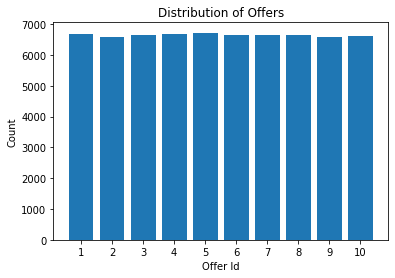

In [50]:
plt.bar(groupByOfferId['offer_id'], groupByOfferId['count'])
plt.xticks(range(1,11))
plt.title("Distribution of Offers")
plt.xlabel("Offer Id")
plt.ylabel("Count");

As we can see, almost same number of offers were rolled out for every offer in the portfolio.

In [51]:
groupByOfferType = pd.merge(dfOfferReceived, portfolio, on='offer_id').groupby(
    'offer_type').offer_id.count().reset_index().rename(columns={'offer_id': 'count'})
groupByOfferType

,offer_type,count
0,bogo,26537
1,discount,26664
2,informational,13300


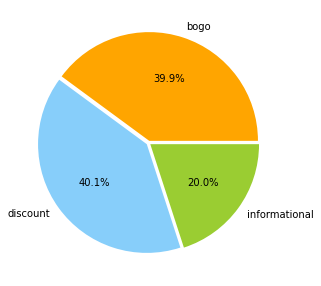

In [52]:
plt.figure(figsize=(5,5))
plt.pie(groupByOfferType['count'], labels=groupByOfferType.offer_type, 
        colors=['orange', 'lightskyblue', 'yellowgreen'], autopct='%1.1f%%', explode=(0.02,0.02,0.02));

The number of bogo and discount offers were similar - 39.9% and 40.1% respectively. Least number of offers were rolled out for informational offer. Therefore, 80% of the offers that were sent out were rewards offers and only 20% of the offers were informational offers.

### 2. How many offers were viewed and completed?
Apart from 'offer received' event, there are events 'offer viewed' and 'offer completed' in the transcripts dataset for rewards offers. For informational offers, only 'offer viewed' event is present. So the success of the offers will be deduced using different techniques.

In [53]:
dfTranscript.head()

,event,time,user_id,transaction,offer_id
0,offer received,0,2,{'offer id': 4},4
2,offer received,0,3,{'offer id': 10},10
5,offer received,0,4,{'offer id': 9},9
7,offer received,0,5,{'offer id': 3},3
8,offer received,0,6,{'offer id': 5},5


In [54]:
offerEvents = dfTranscript[dfTranscript.event.isin(['offer received', 'offer viewed', 'offer completed'])]
offerEvents.head()

,event,time,user_id,transaction,offer_id
0,offer received,0,2,{'offer id': 4},4
2,offer received,0,3,{'offer id': 10},10
5,offer received,0,4,{'offer id': 9},9
7,offer received,0,5,{'offer id': 3},3
8,offer received,0,6,{'offer id': 5},5


In [55]:
offerEvents = offerEvents[~offerEvents.offer_id.isin([3,8])]
print(offerEvents.shape)
offerEvents.head()

(125771, 5)


,event,time,user_id,transaction,offer_id
0,offer received,0,2,{'offer id': 4},4
2,offer received,0,3,{'offer id': 10},10
5,offer received,0,4,{'offer id': 9},9
8,offer received,0,6,{'offer id': 5},5
9,offer received,0,8,{'offer id': 5},5


Separating <b>reward offers</b> from all offers:

In [56]:
offerEvents = pd.merge(offerEvents.drop('transaction', axis=1), 
                       dfPortfolio.drop('offer_type_informational', axis=1), on='offer_id', how='left')
print(offerEvents.shape)
offerEvents.head()

(125771, 13)


,event,time,user_id,offer_id,reward,difficulty,duration,mobile,email,web,social,offer_type_bogo,offer_type_discount
0,offer received,0,2,4,5,5,168,1,1,1,0,1,0
1,offer received,0,3,10,2,10,168,1,1,1,0,0,1
2,offer received,0,4,9,5,5,120,1,1,1,1,1,0
3,offer received,0,6,5,5,20,240,0,1,1,0,0,1
4,offer received,0,8,5,5,20,240,0,1,1,0,0,1


In [57]:
# adding expiry time for the offers received
offerEvents['expiry'] = offerEvents.apply(lambda row: row.duration+row.time if row.event=='offer received' else -1
                                          , axis=1)
print(offerEvents.shape)
offerEvents.head()

(125771, 14)


,event,time,user_id,offer_id,reward,difficulty,duration,mobile,email,web,social,offer_type_bogo,offer_type_discount,expiry
0,offer received,0,2,4,5,5,168,1,1,1,0,1,0,168
1,offer received,0,3,10,2,10,168,1,1,1,0,0,1,168
2,offer received,0,4,9,5,5,120,1,1,1,1,1,0,120
3,offer received,0,6,5,5,20,240,0,1,1,0,0,1,240
4,offer received,0,8,5,5,20,240,0,1,1,0,0,1,240


In [58]:
# sorting the offers based on user_id, offer_id, time
sortedEvents = offerEvents.sort_values(by=['user_id', 'offer_id', 'time'],
                       ascending=[True, True, True]).reset_index(drop=True)
print(sortedEvents.shape)
sortedEvents.head(10)

(125771, 14)


,event,time,user_id,offer_id,reward,difficulty,duration,mobile,email,web,social,offer_type_bogo,offer_type_discount,expiry
0,offer received,408,1,4,5,5,168,1,1,1,0,1,0,576
1,offer completed,528,1,4,5,5,168,1,1,1,0,1,0,-1
2,offer received,408,2,1,10,10,168,1,1,0,1,1,0,576
3,offer viewed,408,2,1,10,10,168,1,1,0,1,1,0,-1
4,offer completed,510,2,1,10,10,168,1,1,0,1,1,0,-1
5,offer received,0,2,4,5,5,168,1,1,1,0,1,0,168
6,offer viewed,6,2,4,5,5,168,1,1,1,0,1,0,-1
7,offer completed,132,2,4,5,5,168,1,1,1,0,1,0,-1
8,offer received,504,2,9,5,5,120,1,1,1,1,1,0,624
9,offer completed,510,2,9,5,5,120,1,1,1,1,1,0,-1


Processing the reward offers: in the sorted data frame, we will look through records to find the matching 'viewed' and 'completed' transactions, and update the viewed and completed fields accordingly.

In [59]:
%%time
sortedEvents['viewed'] = -1
sortedEvents['completed'] = -1
for idx, event, uid, oid, trec in sortedEvents[['event', 'user_id', 'offer_id', 'time']].itertuples():
    if idx+2 < sortedEvents.shape[0] and event == 'offer received':
        print(idx, end='\r')
        # check further records. if found- viewed and completed = 1. else move to next
        evNext, evNext2 = sortedEvents.iloc[idx+1], sortedEvents.iloc[idx+2]
        if evNext.offer_id == oid and evNext.user_id == uid and evNext.event == 'offer viewed':
            if evNext2.offer_id == oid and evNext2.user_id == uid and evNext2.event == 'offer completed':
                sortedEvents.loc[idx, 'viewed'] = 1
                sortedEvents.loc[idx, 'completed'] = 1
                sortedEvents.loc[idx+1, 'viewed'] = 1
                sortedEvents.loc[idx+1, 'completed'] = 1
                sortedEvents.loc[idx+2, 'viewed'] = 1
                sortedEvents.loc[idx+2, 'completed'] = 1
            else:
                sortedEvents.loc[idx, 'viewed'] = 1
                sortedEvents.loc[idx, 'completed'] = 0
                sortedEvents.loc[idx+1, 'viewed'] = 1
                sortedEvents.loc[idx+1, 'completed'] = 0
                
        elif evNext.offer_id == oid and evNext.user_id == uid and evNext.event == 'offer completed':
            if evNext2.offer_id == oid and evNext2.user_id == uid and evNext2.event == 'offer viewed':
                sortedEvents.loc[idx, 'viewed'] = 0
                sortedEvents.loc[idx, 'completed'] = 1
                sortedEvents.loc[idx+1, 'viewed'] = 0
                sortedEvents.loc[idx+1, 'completed'] = 1
                sortedEvents.loc[idx+2, 'viewed'] = 0
                sortedEvents.loc[idx+2, 'completed'] = 1
            else:
                sortedEvents.loc[idx, 'viewed'] = 0
                sortedEvents.loc[idx, 'completed'] = 1
                sortedEvents.loc[idx+1, 'viewed'] = 0
                sortedEvents.loc[idx+1, 'completed'] = 1
        else:
            sortedEvents.loc[idx, 'viewed'] = 0
            sortedEvents.loc[idx, 'completed'] = 0
    
    elif sortedEvents.loc[idx, 'viewed'] < 0:
        if event == 'offer viewed':
            sortedEvents.loc[idx, 'viewed'] = 0
            sortedEvents.loc[idx, 'completed'] = 1
        if event == 'offer completed':
            tempIdx = idx-3
            if tempIdx >= 0:
                evMinus3 = sortedEvents.iloc[tempIdx]
                fillViewed = True
                while tempIdx >= 0 and evMinus3.offer_id == oid and evMinus3.user_id==uid:
                    if evMinus3.completed < 1:
                        if evMinus3.event == 'offer viewed' and fillViewed:
                            sortedEvents.loc[tempIdx, 'viewed'] = -1
                            sortedEvents.loc[tempIdx, 'completed'] = 1
                            fillViewed = False
                        if evMinus3.event == 'offer received':
                            sortedEvents.loc[tempIdx, 'viewed'] = -1
                            sortedEvents.loc[tempIdx, 'completed'] = 1
                            sortedEvents.loc[idx, 'viewed'] = evMinus3.viewed
                            sortedEvents.loc[idx, 'completed'] = 1
                            break
                    tempIdx -= 1


CPU times: user 3min 36s, sys: 7.88 s, total: 3min 44s
Wall time: 3min 44s


In [60]:
sortedEvents.loc[(sortedEvents.viewed==-1), 'viewed']=0
sortedEvents.loc[(sortedEvents.completed==-1), 'completed']=0

Printing the report:

In [61]:
rec = sortedEvents[sortedEvents.event == 'offer received']
print("Total Reward Offers: "+str(rec.shape[0]))
print("Viewed: "+str((sortedEvents.event == 'offer viewed').sum()))
print("Completed: "+str((sortedEvents.event == 'offer completed').sum()))

Total Reward Offers: 53201
Viewed: 40500
Completed: 32070


In [62]:
print("Viewed and Completed: "+str(((rec.viewed==1) & (rec.completed == 1)).sum()))
print("Viewed but not completed: "+str(((rec.viewed==1) & (rec.completed == 0)).sum()))
print("Not viewed but completed: "+str(((rec.viewed==0) & (rec.completed == 1)).sum()))
print("Not viewed and not completed: "+str(((rec.viewed==0) & (rec.completed == 0)).sum()))

Viewed and Completed: 22334
Viewed but not completed: 14014
Not viewed but completed: 9679
Not viewed and not completed: 7174


Separating the <b>Informational Offers</b>. For these type of offers, we would look at 'offer received', 'offer viewed', and 'transaction' records. The informational offers have offer id of 3 or 8 and transactional events have offer id of -1.<br>
Since there is no 'offer complete' event for these offers, their completion would be judged based on the transactions done during the period the offer had an influence over the customer. We assume that if there is any transaction present in this influential period, then the offer is completed.

In [63]:
infoEvents = dfTranscript[
    (dfTranscript.event=='offer received') | (dfTranscript.event=='offer viewed') | (dfTranscript.event=='transaction')
].reset_index()
infoEvents = infoEvents[infoEvents.offer_id.isin([-1,3,8])]
print(infoEvents.shape)
infoEvents.head(10)

(146617, 6)


,index,event,time,user_id,transaction,offer_id
3,7,offer received,0,5,{'offer id': 3},3
7,13,offer received,0,14,{'offer id': 3},3
21,31,offer received,0,34,{'offer id': 8},8
33,44,offer received,0,49,{'offer id': 8},8
42,53,offer received,0,64,{'offer id': 8},8
44,55,offer received,0,66,{'offer id': 8},8
45,56,offer received,0,67,{'offer id': 3},3
71,86,offer received,0,97,{'offer id': 8},8
73,90,offer received,0,99,{'offer id': 3},3
75,92,offer received,0,101,{'offer id': 8},8


In [64]:
infoEvents = pd.merge(infoEvents.drop('transaction', axis=1), dfPortfolio, how='left', on='offer_id')
print(infoEvents.shape)
infoEvents.head(5)

(146617, 15)


,index,event,time,user_id,offer_id,reward,difficulty,duration,mobile,email,web,social,offer_type_bogo,offer_type_discount,offer_type_informational
0,7,offer received,0,5,3,0.0,0.0,96.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0
1,13,offer received,0,14,3,0.0,0.0,96.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0
2,31,offer received,0,34,8,0.0,0.0,72.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0
3,44,offer received,0,49,8,0.0,0.0,72.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0
4,53,offer received,0,64,8,0.0,0.0,72.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0


In [65]:
# removing transactions of users with no informational offers
usersInfoOffers = infoEvents[infoEvents.event!='transaction'].user_id.unique()
infoEvents = infoEvents[infoEvents.user_id.isin(usersInfoOffers)]
print(infoEvents.shape)
infoEvents.head(10)

(98029, 15)


,index,event,time,user_id,offer_id,reward,difficulty,duration,mobile,email,web,social,offer_type_bogo,offer_type_discount,offer_type_informational
0,7,offer received,0,5,3,0.0,0.0,96.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0
1,13,offer received,0,14,3,0.0,0.0,96.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0
2,31,offer received,0,34,8,0.0,0.0,72.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0
3,44,offer received,0,49,8,0.0,0.0,72.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0
4,53,offer received,0,64,8,0.0,0.0,72.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0
5,55,offer received,0,66,8,0.0,0.0,72.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0
6,56,offer received,0,67,3,0.0,0.0,96.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0
7,86,offer received,0,97,8,0.0,0.0,72.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0
8,90,offer received,0,99,3,0.0,0.0,96.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0
9,92,offer received,0,101,8,0.0,0.0,72.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0


In [66]:
# adding the expiry time
infoEvents['expiry'] = infoEvents.apply(lambda row: -1 if row.event=='transaction' else row.duration + row.time, axis=1)
infoEvents.head()

,index,event,time,user_id,offer_id,reward,difficulty,duration,mobile,email,web,social,offer_type_bogo,offer_type_discount,offer_type_informational,expiry
0,7,offer received,0,5,3,0.0,0.0,96.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,96.0
1,13,offer received,0,14,3,0.0,0.0,96.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,96.0
2,31,offer received,0,34,8,0.0,0.0,72.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,72.0
3,44,offer received,0,49,8,0.0,0.0,72.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,72.0
4,53,offer received,0,64,8,0.0,0.0,72.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,72.0


In [67]:
# sorting the values
infoEvents = infoEvents.sort_values(['user_id', 'index']).reset_index(drop=True)
print(infoEvents.shape)
infoEvents.head(10)

(98029, 16)


,index,event,time,user_id,offer_id,reward,difficulty,duration,mobile,email,web,social,offer_type_bogo,offer_type_discount,offer_type_informational,expiry
0,20282,transaction,18,1,-1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-1.0
1,49501,transaction,144,1,-1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-1.0
2,201571,offer received,504,1,3,0.0,0.0,96.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,600.0
3,227842,transaction,528,1,-1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-1.0
4,47582,transaction,132,2,-1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-1.0
5,49502,transaction,144,2,-1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-1.0
6,53176,offer received,168,2,8,0.0,0.0,72.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,240.0
7,85291,offer viewed,216,2,8,0.0,0.0,72.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,288.0
8,87134,transaction,222,2,-1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-1.0
9,92104,transaction,240,2,-1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-1.0


We will now go through the infoEvents, and match the offers 'offer received' with 'offer viewed' and transaction to fill in the 'viewed' and 'completed' values. For 'completed' values, we will check whether the transaction event is before the expiry of the offer.

In [68]:
%%time

infoEvents['viewed'] = -1
infoEvents['completed'] = -1

for idx, uid, oid, event in infoEvents[['user_id', 'offer_id', 'event']].itertuples():
    print(idx, end='\r')
    if event == 'offer received':
        view = comp = 0
        rowsToChange = [idx]
        nextIdx = idx+1
        if nextIdx < infoEvents.shape[0]:
            evNext = infoEvents.iloc[nextIdx]
            # first, find the offer viewed event for the user and the offer id.
            while nextIdx < infoEvents.shape[0] and evNext.user_id == uid and evNext.offer_id == oid:
                if evNext.event == 'offer viewed' and evNext.viewed<0:
                    view=1
                    rowsToChange.append(nextIdx)
                    break
                nextIdx += 1
                if nextIdx < infoEvents.shape[0]:
                    evNext = infoEvents.iloc[nextIdx]
                else:
                    evNext = None
            
        if len(rowsToChange) == 1:
            nextIdx = idx
            evNext = infoEvents.iloc[idx]
            
        start, end = evNext[['time', 'expiry']].values
        nextIdx += 1
        if nextIdx < infoEvents.shape[0]:
            evNext = infoEvents.iloc[nextIdx]
        else:
            evNext = None
        # then, find any transaction that was done before the expiry of the offer.
        while nextIdx < infoEvents.shape[0] and evNext.user_id == uid:
            if evNext.event == 'transaction' and evNext.time < end:
                comp = 1
                break
            nextIdx += 1
            if nextIdx < infoEvents.shape[0]:
                evNext = infoEvents.iloc[nextIdx]
            else:
                evNext = None
                    
        for i in rowsToChange:
            if view in [0,1]:
                infoEvents.loc[i, 'viewed'] = view
            if comp in [0,1]:
                infoEvents.loc[i, 'completed'] = comp

            

CPU times: user 41.2 s, sys: 4.99 s, total: 46.2 s
Wall time: 44.2 s


In [69]:
recinfo = infoEvents[infoEvents.event == 'offer received']
print("Total Reward Offers: "+str(recinfo.shape[0]))
print("Viewed: "+str((infoEvents.event == 'offer viewed').sum()))
print("Completed: "+str((infoEvents.event == 'offer completed').sum()))

Total Reward Offers: 13300
Viewed: 9360
Completed: 0


In [70]:
print("Viewed and Completed: "+str(((recinfo.viewed==1) & (recinfo.completed == 1)).sum()))
print("Viewed but not completed: "+str(((recinfo.viewed==1) & (recinfo.completed == 0)).sum()))
print("Not viewed but completed: "+str(((recinfo.viewed==0) & (recinfo.completed == 1)).sum()))
print("Not viewed and not completed: "+str(((recinfo.viewed==0) & (recinfo.completed == 0)).sum()))

Viewed and Completed: 4932
Viewed but not completed: 2591
Not viewed but completed: 3847
Not viewed and not completed: 1930


Now that we have completion and viewing values for both types of offers, we will <b>concatenate</b> them in one data frame in order to perform statistics on them.

In [71]:
rec.head()

,event,time,user_id,offer_id,reward,difficulty,duration,mobile,email,web,social,offer_type_bogo,offer_type_discount,expiry,viewed,completed
0,offer received,408,1,4,5,5,168,1,1,1,0,1,0,576,0,1
2,offer received,408,2,1,10,10,168,1,1,0,1,1,0,576,1,1
5,offer received,0,2,4,5,5,168,1,1,1,0,1,0,168,1,1
8,offer received,504,2,9,5,5,120,1,1,1,1,1,0,624,0,1
11,offer received,408,3,4,5,5,168,1,1,1,0,1,0,576,1,1


In [72]:
recinfo.head()

,index,event,time,user_id,offer_id,reward,difficulty,duration,mobile,email,web,social,offer_type_bogo,offer_type_discount,offer_type_informational,expiry,viewed,completed
2,201571,offer received,504,1,3,0.0,0.0,96.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,600.0,0,1
6,53176,offer received,168,2,8,0.0,0.0,72.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,240.0,1,1
15,110830,offer received,336,3,3,0.0,0.0,96.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,432.0,0,0
17,7,offer received,0,5,3,0.0,0.0,96.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,96.0,0,0
23,110836,offer received,336,6,8,0.0,0.0,72.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,408.0,1,0


In [73]:
allOffers = pd.concat([rec[['user_id', 'offer_id', 'viewed', 'completed']], 
                       recinfo[['user_id', 'offer_id', 'viewed', 'completed']]])
print(allOffers.shape)
allOffers.head(10)

(66501, 4)


,user_id,offer_id,viewed,completed
0,1,4,0,1
2,2,1,1,1
5,2,4,1,1
8,2,9,0,1
11,3,4,1,1
14,3,7,1,1
17,3,10,1,0
19,4,4,1,0
21,4,4,1,1
24,4,7,1,1


In [74]:
# merging allOffers with dfPortfolio and dfProfile
temp = pd.merge(allOffers, dfPortfolio, on='offer_id')
merged = pd.merge(temp, dfProfile, on='user_id')
print(merged.shape)
merged.head()

(66501, 22)


,user_id,offer_id,viewed,completed,reward,difficulty,duration,mobile,email,web,...,offer_type_discount,offer_type_informational,age,income,gender_F,gender_M,gender_O,signup_day,signup_month,signup_year
0,1,4,0,1,5,5,168,1,1,1,...,0,0,55,112000.0,1,0,0,15,7,2017
1,1,3,0,1,0,0,96,1,1,1,...,0,1,55,112000.0,1,0,0,15,7,2017
2,2,4,1,1,5,5,168,1,1,1,...,0,0,75,100000.0,1,0,0,9,5,2017
3,2,1,1,1,10,10,168,1,1,0,...,0,0,75,100000.0,1,0,0,9,5,2017
4,2,9,0,1,5,5,120,1,1,1,...,0,0,75,100000.0,1,0,0,9,5,2017


Now, we can perform EDA on the merged dataset.

In [75]:
vcStats = merged.groupby(['viewed', 'completed']).user_id.count().reset_index().rename(columns={'user_id': 'counts'})
vcStats

,viewed,completed,counts
0,0,0,9104
1,0,1,13526
2,1,0,16605
3,1,1,27266


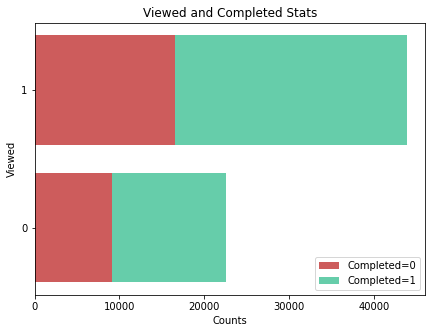

In [76]:
plt.figure(figsize=(7,5))
plt.barh(y=[0,1], width=vcStats[vcStats.completed==0].counts, color='indianred')
plt.barh(y=[0,1], left=vcStats[vcStats.completed==0].counts, width=vcStats[vcStats.completed==1].counts,
       color='mediumaquamarine')
plt.legend(('Completed=0','Completed=1'))
plt.yticks([0,1])
plt.xlabel('Counts')
plt.ylabel('Viewed')
plt.title('Viewed and Completed Stats');

## 3. What is the completion rate of each offer and each type of offer?
Here, type of offer means- BOGO, Discount, and Informational. The completion of the offer is stored in 'completed' field of merged data frame.

Starting with different offer types:

In [77]:
eachOfferRec = merged.groupby('offer_id').user_id.count().reset_index().rename(
columns={'user_id': 'received'})
eachOfferRec

,offer_id,received
0,1,6683
1,2,6593
2,3,6657
3,4,6685
4,5,6726
5,6,6655
6,7,6652
7,8,6643
8,9,6576
9,10,6631


In [78]:
eachOfferCompl = merged[merged.completed==1].groupby('offer_id').user_id.count().reset_index().rename(
    columns={'user_id': 'completed'})
eachOfferCompl

,offer_id,completed
0,1,3604
1,2,3281
2,3,4321
3,4,4141
4,5,3288
5,6,4839
6,7,4929
7,8,4458
8,9,4074
9,10,3857


In [79]:
offerStr = portfolio.offer_type.str.cat(portfolio.difficulty.astype(str), sep='/Spend:').str.cat(
portfolio.reward.astype(str), sep='/Reward:').str.cat(portfolio.duration.astype(str), sep='/Days:')
offerStr

0           bogo/Spend:10/Reward:10/Days:7
1           bogo/Spend:10/Reward:10/Days:5
2    informational/Spend:0/Reward:0/Days:4
3             bogo/Spend:5/Reward:5/Days:7
4       discount/Spend:20/Reward:5/Days:10
5         discount/Spend:7/Reward:3/Days:7
6       discount/Spend:10/Reward:2/Days:10
7    informational/Spend:0/Reward:0/Days:3
8             bogo/Spend:5/Reward:5/Days:5
9        discount/Spend:10/Reward:2/Days:7
Name: offer_type, dtype: object

In [80]:
offerIdStr = portfolio.join(offerStr, lsuffix='_l')[['offer_id', 'offer_type']]
offerIdStr

,offer_id,offer_type
0,1,bogo/Spend:10/Reward:10/Days:7
1,2,bogo/Spend:10/Reward:10/Days:5
2,3,informational/Spend:0/Reward:0/Days:4
3,4,bogo/Spend:5/Reward:5/Days:7
4,5,discount/Spend:20/Reward:5/Days:10
5,6,discount/Spend:7/Reward:3/Days:7
6,7,discount/Spend:10/Reward:2/Days:10
7,8,informational/Spend:0/Reward:0/Days:3
8,9,bogo/Spend:5/Reward:5/Days:5
9,10,discount/Spend:10/Reward:2/Days:7


In [81]:
complStats = pd.merge(pd.merge(offerIdStr, eachOfferRec, on='offer_id'), eachOfferCompl, on='offer_id')
complStats

,offer_id,offer_type,received,completed
0,1,bogo/Spend:10/Reward:10/Days:7,6683,3604
1,2,bogo/Spend:10/Reward:10/Days:5,6593,3281
2,3,informational/Spend:0/Reward:0/Days:4,6657,4321
3,4,bogo/Spend:5/Reward:5/Days:7,6685,4141
4,5,discount/Spend:20/Reward:5/Days:10,6726,3288
5,6,discount/Spend:7/Reward:3/Days:7,6655,4839
6,7,discount/Spend:10/Reward:2/Days:10,6652,4929
7,8,informational/Spend:0/Reward:0/Days:3,6643,4458
8,9,bogo/Spend:5/Reward:5/Days:5,6576,4074
9,10,discount/Spend:10/Reward:2/Days:7,6631,3857


In [82]:
complStats['comp_rate'] = complStats.completed*100.0/complStats.received
complStats

,offer_id,offer_type,received,completed,comp_rate
0,1,bogo/Spend:10/Reward:10/Days:7,6683,3604,53.927877
1,2,bogo/Spend:10/Reward:10/Days:5,6593,3281,49.764902
2,3,informational/Spend:0/Reward:0/Days:4,6657,4321,64.909118
3,4,bogo/Spend:5/Reward:5/Days:7,6685,4141,61.944652
4,5,discount/Spend:20/Reward:5/Days:10,6726,3288,48.884924
5,6,discount/Spend:7/Reward:3/Days:7,6655,4839,72.712246
6,7,discount/Spend:10/Reward:2/Days:10,6652,4929,74.098016
7,8,informational/Spend:0/Reward:0/Days:3,6643,4458,67.108234
8,9,bogo/Spend:5/Reward:5/Days:5,6576,4074,61.952555
9,10,discount/Spend:10/Reward:2/Days:7,6631,3857,58.166189


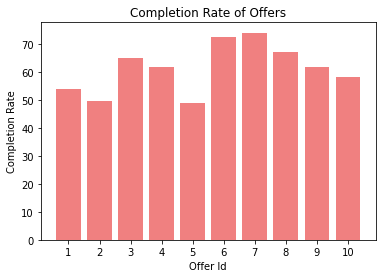

In [83]:
plt.bar(x=complStats.offer_id, height=complStats.comp_rate, color='lightcoral')
plt.title('Completion Rate of Offers')
plt.xlabel('Offer Id')
plt.ylabel('Completion Rate')
plt.xticks(range(1,11));

As we can see from the graph, the offer with id=7, i.e. <b>discount/Spend:10/Reward:2/Days:10</b> had the highest completion rate among all. The offer with id=5 (<b>discount/Spend:20/Reward:5/Days:10	</b>) had the lowest completion rate. The offer with id 5 required higher spendings and was more difficult to achieve.

In [84]:
eachTypeCompl = pd.merge(eachOfferCompl, portfolio[['offer_id', 'offer_type']], on='offer_id')
eachTypeRec = pd.merge(eachOfferRec, portfolio[['offer_id', 'offer_type']], on='offer_id')

In [85]:
eachTypeStats = pd.merge(eachTypeCompl.groupby('offer_type').completed.sum().reset_index(),
         eachTypeRec.groupby('offer_type').received.sum().reset_index(),
         on='offer_type')
eachTypeStats

,offer_type,completed,received
0,bogo,15100,26537
1,discount,16913,26664
2,informational,8779,13300


In [86]:
eachTypeStats['comp_rate'] = eachTypeStats.completed*100.0/eachTypeStats.received
eachTypeStats

,offer_type,completed,received,comp_rate
0,bogo,15100,26537,56.901684
1,discount,16913,26664,63.430093
2,informational,8779,13300,66.007519


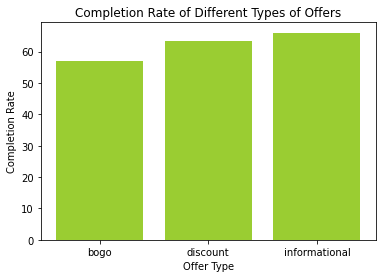

In [87]:
plt.bar(x=eachTypeStats.offer_type, height=eachTypeStats.comp_rate, color='yellowgreen')
plt.title('Completion Rate of Different Types of Offers')
plt.xlabel('Offer Type')
plt.ylabel('Completion Rate');

As we can see, the most offers that were completed were informational offers. The BOGO offers were least completed.

## 4. What is the success rate of offers?
The success rate differs from completiong rate in that an offer is only considered to be successful if it was viewed and completed. The offers which were completed without being viewed were wasted, since the customer anyways spent the money on the product.

In [88]:
eachOfferSuccess = merged[(merged.completed==1)&(merged.viewed==1)
                         ].groupby('offer_id').user_id.count().reset_index().rename(columns={'user_id': 'successful'})
eachOfferSuccess

,offer_id,successful
0,1,2554
1,2,2719
2,3,1808
3,4,2020
4,5,1281
5,6,4095
6,7,4288
7,8,3124
8,9,3354
9,10,2023


In [89]:
eachOfferSuccessStats = pd.merge(eachOfferSuccess, eachOfferRec, on='offer_id')
eachOfferSuccessStats['success_rate'] = eachOfferSuccessStats.successful*100.0/eachOfferSuccessStats.received

In [90]:
eachOfferSuccessStats

,offer_id,successful,received,success_rate
0,1,2554,6683,38.216370
1,2,2719,6593,41.240710
2,3,1808,6657,27.159381
3,4,2020,6685,30.216904
4,5,1281,6726,19.045495
5,6,4095,6655,61.532682
6,7,4288,6652,64.461816
7,8,3124,6643,47.026946
8,9,3354,6576,51.003650
9,10,2023,6631,30.508219


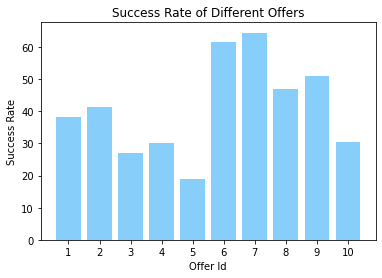

In [91]:
plt.bar(x=eachOfferSuccessStats.offer_id, height=eachOfferSuccessStats.success_rate, color='lightskyblue')
plt.title('Success Rate of Different Offers')
plt.xlabel('Offer Id')
plt.ylabel('Success Rate')
plt.xticks(range(1,11));

As with the completion rate, the offer with id=7, i.e. <b>discount/Spend:10/Reward:2/Days:10</b> had the highest success rate amongst all 10. The offer with id=5 (<b>discount/Spend:20/Reward:5/Days:10</b>) had the lowest success rate.

## 5. What does the demographic of the users looks like?
Here we will explore what type of users are present. Later we will explore the relationship between user and offer completion rate.

In [92]:
dfProfile.head()

,age,income,user_id,gender_F,gender_M,gender_O,signup_day,signup_month,signup_year
1,55,112000.0,1,1,0,0,15,7,2017
3,75,100000.0,2,1,0,0,9,5,2017
5,68,70000.0,3,0,1,0,26,4,2018
8,65,53000.0,4,0,1,0,9,2,2018
12,58,51000.0,5,0,1,0,11,11,2017


Starting with age distribution:

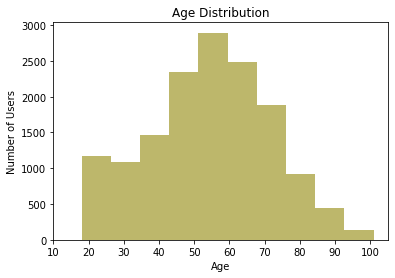

In [93]:
plt.hist(dfProfile.age, bins=10, color='darkkhaki')
plt.xticks(range(10,110,10))
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Number of Users');

The users are distributed normally, with most users present in the ages of 40-70.

Next, looking at gender distribution:

In [94]:
gender = profile.dropna().value_counts('gender').reset_index().rename(columns={0: 'counts'})
gender

,gender,counts
0,M,8484
1,F,6129
2,O,212


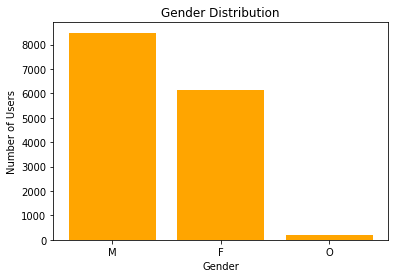

In [95]:
plt.bar(x=gender.gender, height=gender.counts, color='orange')
plt.title('Gender Distribution')
plt.xlabel('Gender')
plt.ylabel('Number of Users');

There are maximum number of males present, followed by females, and then those who does not identify as either male or female.

Let's take a look at how the income distribution looks like:

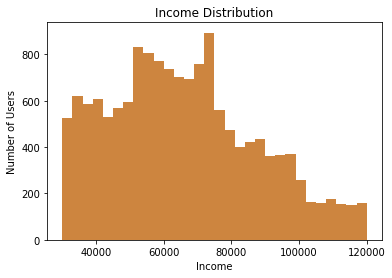

In [96]:
plt.hist(dfProfile.income, bins=30, color='peru')
plt.title('Income Distribution')
plt.xlabel('Income')
plt.ylabel('Number of Users');

Most of the users earn less than 80,000. There are some users with salaries reaching upto 120,000.

Lastly, taking a look at how long users have been members:

In [97]:
profile.became_member_on

0        20170212
1        20170715
2        20180712
3        20170509
4        20170804
           ...   
16995    20180604
16996    20180713
16997    20170126
16998    20160307
16999    20170722
Name: became_member_on, Length: 17000, dtype: int64

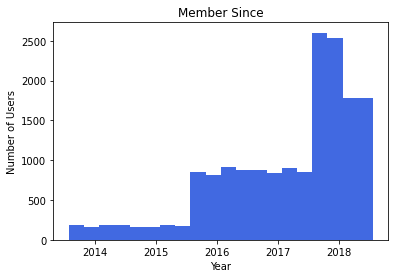

In [98]:
plt.hist(pd.to_datetime(profile.became_member_on, format='%Y%m%d'), bins=20, color='royalblue')
plt.title('Member Since')
plt.xlabel('Year')
plt.ylabel('Number of Users');

Most of the users are member since the mid-2017. Very few users have been members since 2014.

## 6. What is the correlation between attributes of users and offers and offer success rate?
Finally, we will look at how does user demographics influence the offer success rate along with the offeer attributes that might affect the offer success rate. Particularly, we will look at different types of users based on their ages, incomes, genders, and signup dates, and different types of channels that are used to advertise the offers. To reiterate, the successful offers are those which are viewed and completed.

In [99]:
merged['successful'] = merged.apply(lambda row: 1 if (row.viewed==1) and (row.completed==1) else 0, axis=1)

In [100]:
merged.head()

,user_id,offer_id,viewed,completed,reward,difficulty,duration,mobile,email,web,...,offer_type_informational,age,income,gender_F,gender_M,gender_O,signup_day,signup_month,signup_year,successful
0,1,4,0,1,5,5,168,1,1,1,...,0,55,112000.0,1,0,0,15,7,2017,0
1,1,3,0,1,0,0,96,1,1,1,...,1,55,112000.0,1,0,0,15,7,2017,0
2,2,4,1,1,5,5,168,1,1,1,...,0,75,100000.0,1,0,0,9,5,2017,1
3,2,1,1,1,10,10,168,1,1,0,...,0,75,100000.0,1,0,0,9,5,2017,1
4,2,9,0,1,5,5,120,1,1,1,...,0,75,100000.0,1,0,0,9,5,2017,0


In [101]:
portfolio

,reward,channels,difficulty,duration,offer_type,id,mobile,email,web,social,offer_id
0,10,"[email, mobile, social]",10,7,bogo,ae264e3637204a6fb9bb56bc8210ddfd,1,1,0,1,1
1,10,"[web, email, mobile, social]",10,5,bogo,4d5c57ea9a6940dd891ad53e9dbe8da0,1,1,1,1,2
2,0,"[web, email, mobile]",0,4,informational,3f207df678b143eea3cee63160fa8bed,1,1,1,0,3
3,5,"[web, email, mobile]",5,7,bogo,9b98b8c7a33c4b65b9aebfe6a799e6d9,1,1,1,0,4
4,5,"[web, email]",20,10,discount,0b1e1539f2cc45b7b9fa7c272da2e1d7,0,1,1,0,5
5,3,"[web, email, mobile, social]",7,7,discount,2298d6c36e964ae4a3e7e9706d1fb8c2,1,1,1,1,6
6,2,"[web, email, mobile, social]",10,10,discount,fafdcd668e3743c1bb461111dcafc2a4,1,1,1,1,7
7,0,"[email, mobile, social]",0,3,informational,5a8bc65990b245e5a138643cd4eb9837,1,1,0,1,8
8,5,"[web, email, mobile, social]",5,5,bogo,f19421c1d4aa40978ebb69ca19b0e20d,1,1,1,1,9
9,2,"[web, email, mobile]",10,7,discount,2906b810c7d4411798c6938adc9daaa5,1,1,1,0,10


In [102]:
pd.merge(merged[['offer_id', 'successful', 'age']], portfolio[['offer_id', 'offer_type']], on='offer_id')

,offer_id,successful,age,offer_type
0,4,0,55,bogo
1,4,1,75,bogo
2,4,1,68,bogo
3,4,0,65,bogo
4,4,1,65,bogo
...,...,...,...,...
66496,2,1,52,bogo
66497,2,1,58,bogo
66498,2,0,21,bogo
66499,2,0,21,bogo


### What is the distribution of successful offers among the user age?
Since age is a continuous variable, we divide the users among 5 age groups. To do this, we use np.histogram with bins=5 to get 5 bins for the distribution of ages. The decrement of lower value of first bin is done so people with lowest age will fall into the 1st group (instead of 0th group). Then, we will plot the graph of what was the success rate of each offer type (BOGO, Discount, and Informational offers) - in terms of how many offers of that type were successful out of those that were rolled out.

In [103]:
count, division = np.histogram(merged.age, bins=5)
division[0] = division[0]-1
division

array([ 17. ,  34.6,  51.2,  67.8,  84.4, 101. ])

In [104]:
merged['age_group'] = merged.apply(lambda row: np.searchsorted(division, row.age), axis=1)

In [105]:
ageDist = pd.merge(merged[['user_id', 'offer_id', 'successful', 'age_group']], 
                   portfolio[['offer_id', 'offer_type']], on='offer_id')
ageDist.head()

,user_id,offer_id,successful,age_group,offer_type
0,1,4,0,3,bogo
1,2,4,1,4,bogo
2,3,4,1,4,bogo
3,4,4,0,3,bogo
4,4,4,1,3,bogo


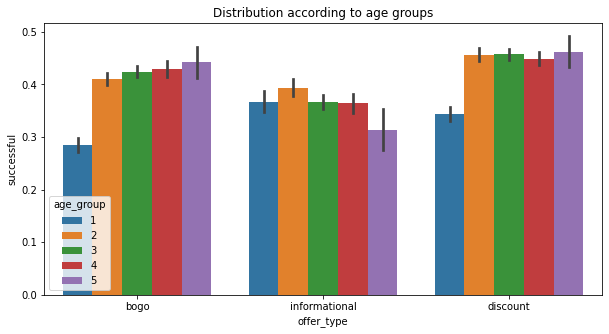

In [106]:
plt.figure(figsize=(10, 5))
plt.title("Distribution according to age groups")
plt.xlabel('Offer Id')
plt.ylabel('Proportion of Success')
sns.barplot(data=ageDist, x='offer_type', y='successful', hue='age_group');

<b>Conclusions:</b><br>
1. The minimum age of the users is 18 and the oldest user is 101 years old.
2. BOGO was less popular among the youngest age group of 17-34.6. This could be because the BOGO offers are the hardest to complete, since to claim the rewards of BOGO offer, the user has to make one big transaction, whereas benefits of discount offer can be collected with multiple smaller transactions.
3. The oldest users (84.4-101 years) preferred discount offers more than BOGO, and BOGO more than informational offers.
4. Overall, people of all ages (except youngest group) preferred discount offers. People in the age groups 2-4 (34.6-84.4) preferred BOGO over informational, and among the youngest people, informational offers had highest success rates since those are easiest to complete. 

### What is the distribution of successful offers according to the users' gender?
Here, we will look at if people of any gender has preference for one type of offer than other. To arrange the data, we would need to first put mapped user ids in the ```profile``` table and merge it with ```merged``` table. There are 3 categories for gender- Male, Female, and all those who does not identify as either male or female, Others. As seen from previous analysis, highest number of users identify as males, and least number of users identify as others.

In [107]:
def getUserId(row):
    '''
    Returns the user id from the hashed id in profile table.
    Input-
        row: The row of data frame containing hashed user id.
    Return-
        The sequential user is stored in user_id_map dictionary.
    '''
    try:
        return user_id_map[row.id]
    except:
        return -1

In [108]:
profile['user_id'] = profile.dropna().apply(lambda row: getUserId(row), axis=1)
profile['user_id'] = profile.user_id.fillna(-1).astype(int)

In [109]:
profile.head()

,gender,age,id,became_member_on,income,user_id
0,None,118,68be06ca386d4c31939f3a4f0e3dd783,20170212,NaN,-1
1,F,55,0610b486422d4921ae7d2bf64640c50b,20170715,112000.0,1
2,None,118,38fe809add3b4fcf9315a9694bb96ff5,20180712,NaN,-1
3,F,75,78afa995795e4d85b5d9ceeca43f5fef,20170509,100000.0,2
4,None,118,a03223e636434f42ac4c3df47e8bac43,20170804,NaN,-1


In [110]:
genderDist = pd.merge(ageDist, profile.dropna()[['user_id', 'gender']], on='user_id')
genderDist.head()

,user_id,offer_id,successful,age_group,offer_type,gender
0,1,4,0,3,bogo,F
1,1,3,0,3,informational,F
2,2,4,1,4,bogo,F
3,2,1,1,4,bogo,F
4,2,9,0,4,bogo,F


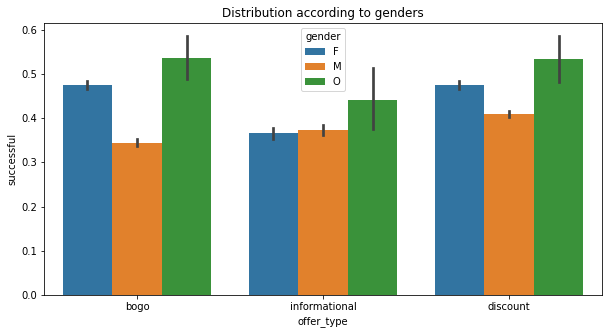

In [111]:
plt.figure(figsize=(10, 5))
plt.title("Distribution according to genders")
plt.xlabel('Offer Type')
plt.ylabel('Proportion of Success')
sns.barplot(data=genderDist, x='offer_type', y='successful', hue='gender');

<b>Conclusions:</b><br>
1. The success rate of BOGO and Discount offer appears to be same for females and people of other genders.
2. Males preferred discount offers more than informational offers, and informational offers more than BOGOs.
3. Females and non-binary users preferred BOGO and Discount offers more than informational offers. 
4. For all offer types combined, females had higher offer success rates than men.

### What is the distribution of successful offers according to the users' income?
Like ages, the income of users is also continuous. Therefore, we divide the income in 5 groups using np.histogram and bins=5. This gives us income groups from 1-5, the lowest income being that of 30,000 and highest being 120,000.

In [112]:
count, division = np.histogram(merged.income, bins=5)
division[0] = division[0]-1
division

array([ 29999.,  48000.,  66000.,  84000., 102000., 120000.])

In [113]:
merged['income_group'] = merged.apply(lambda row: np.searchsorted(division, row.income), axis=1)
merged.head()

,user_id,offer_id,viewed,completed,reward,difficulty,duration,mobile,email,web,...,income,gender_F,gender_M,gender_O,signup_day,signup_month,signup_year,successful,age_group,income_group
0,1,4,0,1,5,5,168,1,1,1,...,112000.0,1,0,0,15,7,2017,0,3,5
1,1,3,0,1,0,0,96,1,1,1,...,112000.0,1,0,0,15,7,2017,0,3,5
2,2,4,1,1,5,5,168,1,1,1,...,100000.0,1,0,0,9,5,2017,1,4,4
3,2,1,1,1,10,10,168,1,1,0,...,100000.0,1,0,0,9,5,2017,1,4,4
4,2,9,0,1,5,5,120,1,1,1,...,100000.0,1,0,0,9,5,2017,0,4,4


In [114]:
incomeDist = pd.merge(merged[['user_id', 'offer_id', 'successful', 'income_group']], 
                   portfolio[['offer_id', 'offer_type']], on='offer_id')
incomeDist.head()

,user_id,offer_id,successful,income_group,offer_type
0,1,4,0,5,bogo
1,2,4,1,4,bogo
2,3,4,1,3,bogo
3,4,4,0,2,bogo
4,4,4,1,2,bogo


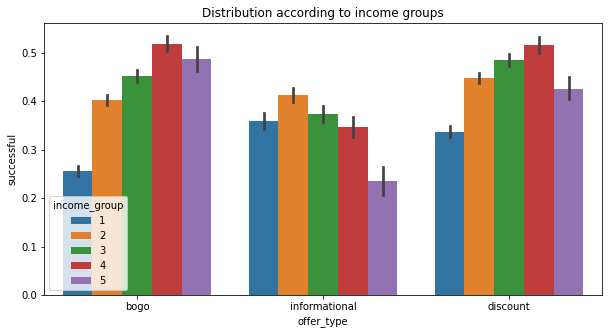

In [115]:
plt.figure(figsize=(10, 5))
plt.title("Distribution according to income groups")
plt.xlabel('Offer Type')
plt.ylabel('Proportion of Success')
sns.barplot(data=incomeDist, x='offer_type', y='successful', hue='income_group');

<b>Conclusions:</b><br>
1. As might have been evident from the problem statement, the BOGO offer, being the most difficult, is least popular among the people in lowest income group. This group prefers informational and discount offers over BOGOs.
2. People in highest income group prefers BOGOs more than any other type of offers.
3. Generally, as the income increases, success rates for BOGOs and Discount offers increases, and that for informational offer decreases.
4. People in the second income group has similar distribution for success rates of the three types of offers.

### What is the distribution of successful offers according to the users' signup date?
Here, we will look at the success rates of the different types of offers based on the year the user signed up in.

In [116]:
signupDist = pd.merge(merged[['user_id', 'offer_id', 'successful', 'signup_year']], 
                   portfolio[['offer_id', 'offer_type']], on='offer_id')
signupDist.head()

,user_id,offer_id,successful,signup_year,offer_type
0,1,4,0,2017,bogo
1,2,4,1,2017,bogo
2,3,4,1,2018,bogo
3,4,4,0,2018,bogo
4,4,4,1,2018,bogo


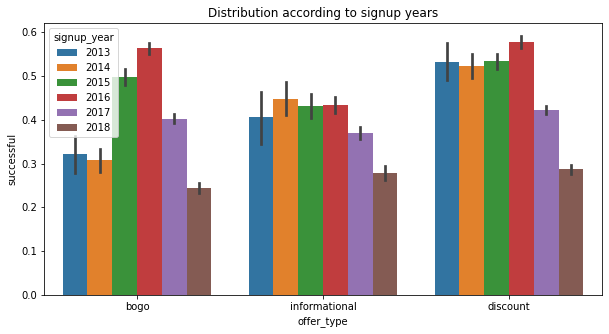

In [117]:
plt.figure(figsize=(10, 5))
plt.title("Distribution according to signup years")
plt.xlabel('Offer Type')
plt.ylabel('Proportion of Success')
sns.barplot(data=signupDist, x='offer_type', y='successful', hue='signup_year');

<b>Conclusions:</b><br>
1. For users who signed up in and after 2015, there is a drop in the success rates of the offers for every offer type.
2. Users since 2016 has the highest success rate.
3. Generally, users from all the years complete discount offers more than other 2 types of offers.

## Data Modelling

#### Now we will model the data to predict the success of offer using various classifiers, and try to improve the model.

In [131]:
allOffers.head()

,user_id,offer_id,viewed,completed,successful
0,1,4,0,1,0
2,2,1,1,1,1
5,2,4,1,1,1
8,2,9,0,1,0
11,3,4,1,1,1


The relevant columns to train a classifier on the data are  age,	income,	gender_F,	gender_M,	gender_O,	signup_day,	signup_month,	signup_year,	difficulty,	duration,	reward,	social,	mobile,	email,	web,	offer_type_bogo,	offer_type_discount,	offer_type_informational, and	successful.
Therefore, we would combine the all offers data set with dfPortfolio and dfProfile.

In [130]:
allOffers['successful'] = allOffers.apply(lambda row: 1 if (row.viewed==1) and (row.completed==1) else 0, axis=1)

In [132]:
temp1 = pd.merge(allOffers.drop(['viewed', 'completed'], axis=1), dfProfile, on='user_id').drop('user_id', axis=1)
finalOffers = pd.merge(temp1, dfPortfolio, on='offer_id').drop('offer_id', axis=1)
print(finalOffers.shape)
finalOffers.head()

(66501, 19)


,successful,age,income,gender_F,gender_M,gender_O,signup_day,signup_month,signup_year,reward,difficulty,duration,mobile,email,web,social,offer_type_bogo,offer_type_discount,offer_type_informational
0,0,55,112000.0,1,0,0,15,7,2017,5,5,168,1,1,1,0,1,0,0
1,1,75,100000.0,1,0,0,9,5,2017,5,5,168,1,1,1,0,1,0,0
2,1,68,70000.0,0,1,0,26,4,2018,5,5,168,1,1,1,0,1,0,0
3,0,65,53000.0,0,1,0,9,2,2018,5,5,168,1,1,1,0,1,0,0
4,1,65,53000.0,0,1,0,9,2,2018,5,5,168,1,1,1,0,1,0,0


In [137]:
# splitting the data frame into X and y
X = finalOffers.iloc[:, 1:]
y = finalOffers.iloc[:, 0]

In [138]:
X.head()

,age,income,gender_F,gender_M,gender_O,signup_day,signup_month,signup_year,reward,difficulty,duration,mobile,email,web,social,offer_type_bogo,offer_type_discount,offer_type_informational
0,55,112000.0,1,0,0,15,7,2017,5,5,168,1,1,1,0,1,0,0
1,75,100000.0,1,0,0,9,5,2017,5,5,168,1,1,1,0,1,0,0
2,68,70000.0,0,1,0,26,4,2018,5,5,168,1,1,1,0,1,0,0
3,65,53000.0,0,1,0,9,2,2018,5,5,168,1,1,1,0,1,0,0
4,65,53000.0,0,1,0,9,2,2018,5,5,168,1,1,1,0,1,0,0


In [139]:
y.head()

0    0
1    1
2    1
3    0
4    1
Name: successful, dtype: int64

In [140]:
# splitting the dataset into train and test sets. The test size will be 30% of the dataset.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=491)

Scaling the dataset: first we will fit and transform the X_train, and then transform the X_test using that. Doing this ensures that our model does not see any part of our test set, and only trains on the information from training set.

In [141]:
ss = StandardScaler()
X_train = ss.fit_transform(X_train)
X_test = ss.transform(X_test)

### Logistic Regression
Firstly, we will use logistic regression as a binary classifier to predict whether a particular offer for a particular user will be successful or not.

In [142]:
%%time

lr = LogisticRegression(random_state=491)
lr.fit(X_train, y_train)

CPU times: user 464 ms, sys: 70 ms, total: 534 ms
Wall time: 157 ms


LogisticRegression(random_state=491)

In [143]:
%%time

y_pred = lr.predict(X_test)

CPU times: user 3.25 ms, sys: 1.07 ms, total: 4.32 ms
Wall time: 1.39 ms


In [144]:
print(report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.67      0.79      0.73     11655
           1       0.61      0.46      0.52      8296

    accuracy                           0.65     19951
   macro avg       0.64      0.63      0.63     19951
weighted avg       0.65      0.65      0.64     19951



### Random Forest Classifier
Now, we would try to improve our results by training a random forest classifier.

In [145]:
%%time

rf = RandomForestClassifier()
rf.fit(X_train, y_train)

CPU times: user 4.05 s, sys: 127 ms, total: 4.18 s
Wall time: 4.26 s


RandomForestClassifier()

In [146]:
%%time

y_pred_rf = rf.predict(X_test)

CPU times: user 540 ms, sys: 8.08 ms, total: 548 ms
Wall time: 557 ms


In [147]:
print(report(y_test, y_pred_rf))

              precision    recall  f1-score   support

           0       0.70      0.76      0.73     11655
           1       0.62      0.54      0.58      8296

    accuracy                           0.67     19951
   macro avg       0.66      0.65      0.65     19951
weighted avg       0.66      0.67      0.67     19951



As we can see, random forest classifier gives better accuracy for the classification than the logistic regressor.


In [148]:
rf.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

## CONCLUSION:
This project aims at analyzing the customers’ reception to the offers rolled out by Starbucks through their mobile app. We probed through the provided data sets and deduced the patterns that would help Starbucks in improving its ad-targeting.<br><br>
We were able to unearth the following insights from the data:<br>
1. More number of BOGO and discount offers were rolled out than informational offers.<br>
2. Majority of the offers that were viewed were completed. There were around 1400 offers that were wasted, i.e., users completed them through their regular spending without being aware of them.<br>
3. The offer with id=7, i.e. discount/Spend:10/Reward:2/Days:10 had the highest completion rate among all. The offer with id=5 (discount/Spend:20/Reward:5/Days:10) had the lowest completion rate. The offer with id 5 required higher spending and was more difficult to achieve.<br>
4. Also, the most offers that were completed were informational offers. The BOGO offers were the least completed.<br>
5. The offer with id=7, i.e., discount/Spend:10/Reward:2/Days:10 had the highest success rate amongst all 10. The offer with id=5 (discount/Spend:20/Reward:5/Days:10) had the lowest success rate.<br>
6. Regarding users, most were males. The age group of 40–70 years had the highest users. Most of the users earn less than 80,000. There are some users with salaries reaching up to 120,000. Most of the users are members since mid-2017. Very few users have been members since 2014.<br>
7. Correlation between offers’ success and user factors:<br>
(i) Age-<br>
· BOGO was less popular among the youngest age group of 17–34.6.
· The oldest users (84.4–101 years) preferred discount offers more than BOGO and BOGO more than informational offers.<br>
· Overall, people of all ages (except the youngest group) preferred discount offers.<br>
(ii) Gender-<br>
· Males preferred discount offers more than informational offers and informational offers more than BOGOs.<br>
· Females and non-binary users preferred BOGO and Discount offers more than informational offers.<br>
· For all offer types combined, females had higher offer success rates than men.<br>
(iii) Income-<br>
· People in the highest income group prefer BOGOs more than any other type of offers.<br>
· The BOGO offer, being the most difficult, is least popular among the people in the lowest income group.<br>
· Generally, as the income increases, success rates for BOGOs and Discount offers increases, and that for informational offer decreases. Therefore, for people with higher incomes, reward offers would be better.<br>
(iv) Signup Date-<br>
· Users since 2016 has the highest success rate.<br>
· Generally, users from all the years complete discount offers more than the other 2 types of offers.<br>
· For users who signed up in and after 2015, there is a drop in the success rates of the offers for every offer type.<br> This means users from 2015 are more likely to complete the presented offers.<br><br>

#### FUTURE SCOPE:<br>
(a) Grid Search- the model can be put through GridSearchCV for various classifiers to improve the performance through validation. In the end, we could get hyperparameters that would give the best performance out of all the hyperparameters.<br>
(b) Neural Networks- training the data on neural networks might give better prediction performance.<br>
(c) Feature Engineering- more data can be generated from the given data. For example, PCA can be used to extract features, or features can be combined to generate polynomial features.<br>
(d) Channels- more channels of advertising the offers can be explored and analyzed.<br><br>
The <b>Medium</b> blog for this project can be found at: https://abhyuday-singh.medium.com/improving-starbucks-offers-success-rate-a-study-to-analyze-purchasing-decisions-6fa4b1651d97